# 4 - Regression Models
by: Torres Espinosa, Jose Antonio

In [1]:
# Dependencies
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import seed
from time import time

# from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

# from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_squared_error, PredictionErrorDisplay

# Own Modules
sys.path.append('./utils/')
from utils.dataprocesor import Preprocessor

# Data Preprocess

In [2]:
p = Preprocessor()
# Impute, Scale and split them
prec_sc, rain_sc = p.preprocess_data(verbose=True)

2023-09-24 20:24:50.497 INFO    root: Preprocessor()
2023-09-24 20:24:50,497 [INFO]: root: Preprocessor()
2023-09-24 20:24:50.499 INFO    root: OpenData()
2023-09-24 20:24:50,499 [INFO]: root: OpenData()
2023-09-24 20:24:50.501 INFO    root: read_csv(data/data-01-22.csv)
2023-09-24 20:24:50,501 [INFO]: root: read_csv(data/data-01-22.csv)
2023-09-24 20:24:50.576 INFO    root: preprocess_data(verbose=True)
2023-09-24 20:24:50,576 [INFO]: root: preprocess_data(verbose=True)
2023-09-24 20:24:50.577 INFO    root: Xy(, verbose=False)
2023-09-24 20:24:50,577 [INFO]: root: Xy(, verbose=False)


In [3]:
# Check data
print('Keys: ' + str(p.splited['prec'].keys()),
      'Prec: ' + str([data.shape for data in p.splited['prec'].values()]),
      'Rain: ' + str([data.shape for data in p.splited['rain'].values()]),
      'Columns: ' + str(p.splited['rain']['X_train'].columns), sep='\n')

Keys: dict_keys(['X_train', 'X_test', 'y_train', 'y_test'])
Prec: [(5883, 6), (1961, 6), (5883,), (1961,)]
Rain: [(2046, 6), (682, 6), (2046,), (682,)]
Columns: Index(['tmed', 'tmin', 'tmax', 'velmedia', 'racha', 'presMin'], dtype='object')


In [4]:
p.splited['prec'].keys()

dict_keys(['X_train', 'X_test', 'y_train', 'y_test'])

# Models
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))

#### I - KNeighborsRegressor
* Manual optimal search

In [5]:
# Errors
errors = {}
error_train, error_test, error_all = [],[],[]
# Train loop
for i in range(1, 26):
    # Model
    k_mod = KNeighborsRegressor(n_neighbors=i, metric='euclidean')
    k_mod.fit(p.splited['prec']['X_train'], p.splited['prec']['y_train'])
    # Predictions
    pred_test = k_mod.predict((p.splited['prec']['X_test']))
    pred_train = k_mod.predict(p.splited['prec']['X_train'])
    pred_all = k_mod.predict(prec_sc)
    # Error eval
    error_train.append(np.sqrt(mean_squared_error(p.splited['prec']['y_train'], pred_train)))
    error_test.append(np.sqrt(mean_squared_error(p.splited['prec']['y_test'], pred_test)))
    error_all.append(np.sqrt(mean_squared_error(p.y['prec'], pred_all)))
    errors.update({f'{i}':[error_test[-1], error_train[-1], error_all[-1]]})

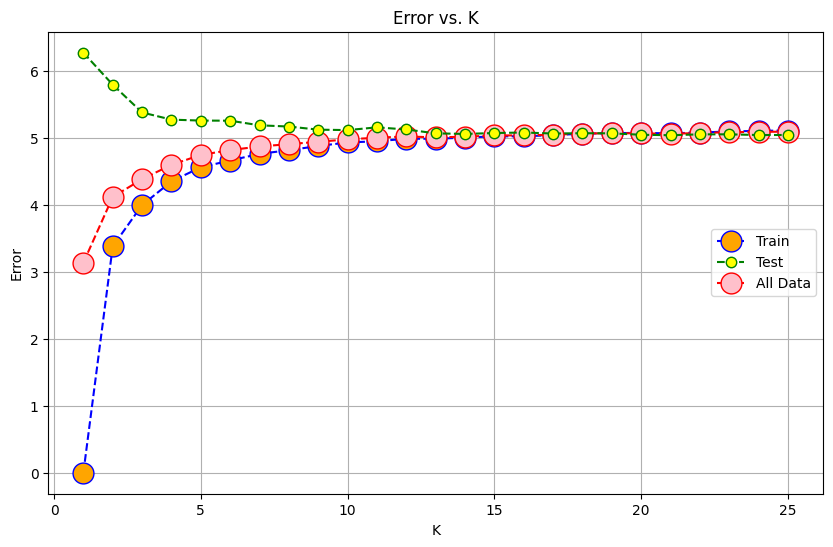

In [6]:
%matplotlib inline
# -- Graph - Error vs k --
plt.rcParams['figure.figsize'] = [10, 6]
# Train Data Results
plt.plot(range(1,26), error_train, color='blue', linestyle='dashed',
         marker='o', markerfacecolor='orange', markersize = 15)
# Test Data Results
plt.plot(range(1,26), error_test, color='green', linestyle='dashed',
         marker='.', markerfacecolor='yellow', markersize = 15, zorder=3)
# Dataset Results
plt.plot(range(1,26), error_all, color='red', linestyle='dashed',
         marker='o', markerfacecolor='pink', markersize = 15)
# Graphic params
plt.title('Error vs. K')
plt.xlabel('K')
plt.ylabel('Error')
plt.legend(["Train", 'Test', "All Data"], loc='center right')
plt.grid()
plt.show()

In [7]:
# Top results
kn_results = pd.DataFrame(errors).T.rename(columns={0:'Test',1:'Train',2:'All'})
kn_results.sort_values(by='All').head(15)

,Test,Train,All
1,6.558668,0.000000,3.279334
2,6.325790,3.053330,4.122623
3,6.170207,3.756794,4.483636
4,6.139831,4.045737,4.658366
5,6.067902,4.198257,4.735386
6,6.039693,4.344172,4.824246
7,6.024032,4.432708,4.879438
8,6.014223,4.456982,4.892978
9,6.029507,4.528997,4.946979
10,6.021806,4.564530,4.969078


* Metrics

In [7]:
# -- KNeighborsRegressor
k_mod = KNeighborsRegressor(n_neighbors=10, metric='euclidean')
k_mod.fit(p.splited['prec']['X_train'], p.splited['prec']['y_train'])

KNeighborsRegressor(metric='euclidean', n_neighbors=10)

In [8]:
# Predictions
y_pred = k_mod.predict(p.splited['prec']['X_test'])
y_pred1 = k_mod.predict(p.splited['prec']['X_train'])
y_pred2 = k_mod.predict(prec_sc)
print("Use KNeighborsRegressor(k=10) rmse:\n",
      " - Test data:",
      np.sqrt(mean_squared_error(p.splited['prec']['y_test'], y_pred)),'\n',
      " - Train data:",
      np.sqrt(mean_squared_error(p.splited['prec']['y_train'], y_pred1)),'\n',
      " - All data:",
      np.sqrt(mean_squared_error(p.y['prec'], y_pred2))
)

Use KNeighborsRegressor(k=10) rmse:
  - Test data: 5.113365948253139 
  - Train data: 4.928770564682361 
  - All data: 4.975561504960836


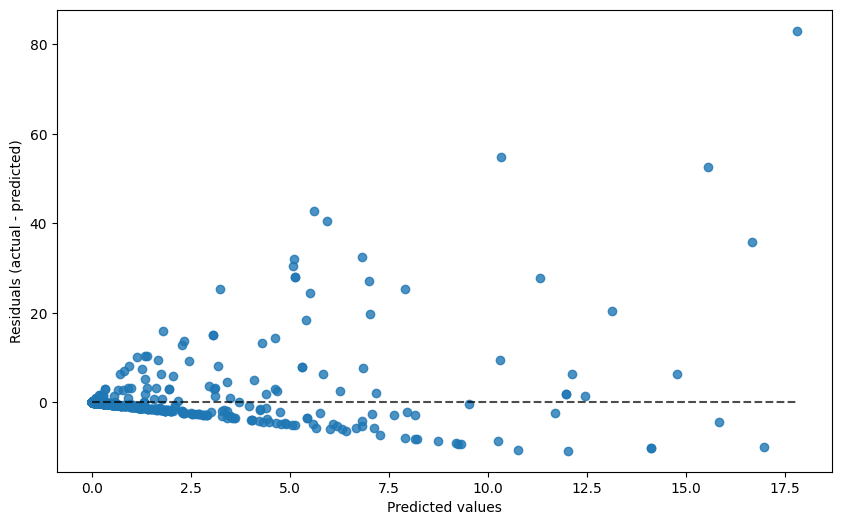

In [9]:
# Residuals vs Predicted - Train
display = PredictionErrorDisplay.from_estimator(k_mod, p.splited['prec']['X_train'],
                                                p.splited['prec']['y_train'])


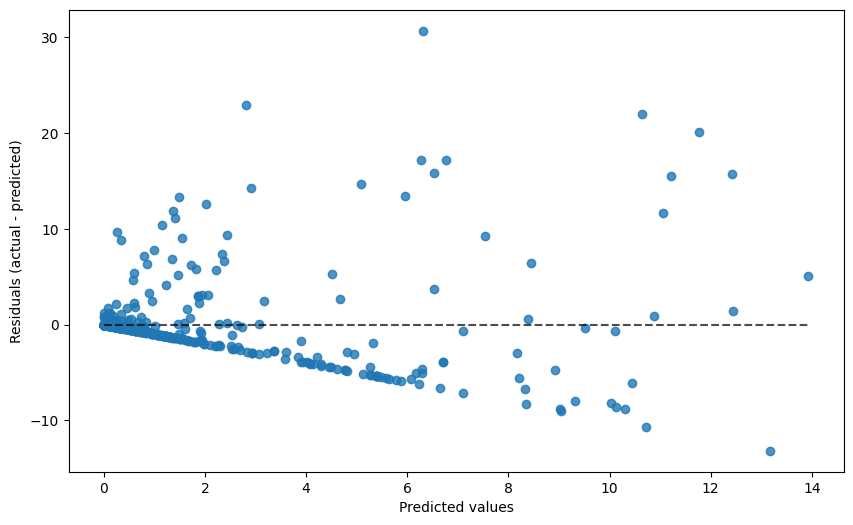

In [10]:
# Residuals vs Predicted - All
display = PredictionErrorDisplay.from_estimator(k_mod, prec_sc,p.y['prec'])

In [11]:
# -- KNeighborsRegressor
k_mod = KNeighborsRegressor(n_neighbors=9, metric='euclidean')
k_mod.fit(p.splited['prec']['X_train'], p.splited['prec']['y_train'])

KNeighborsRegressor(metric='euclidean', n_neighbors=9)

In [12]:
# Predictions
y_pred = k_mod.predict(p.splited['prec']['X_test'])
y_pred1 = k_mod.predict(p.splited['prec']['X_train'])
y_pred2 = k_mod.predict(prec_sc)
print("Use KNeighborsRegressor(k=9) rmse:\n",
      " - Test data:",
      np.sqrt(mean_squared_error(p.splited['prec']['y_test'], y_pred)),'\n',
      " - Train data:",
      np.sqrt(mean_squared_error(p.splited['prec']['y_train'], y_pred1)),'\n',
      " - All data:",
      np.sqrt(mean_squared_error(p.y['prec'], y_pred2))
)

Use KNeighborsRegressor(k=9) rmse:
  - Test data: 5.120136613763122 
  - Train data: 4.8764215635076935 
  - All data: 4.938478023104035


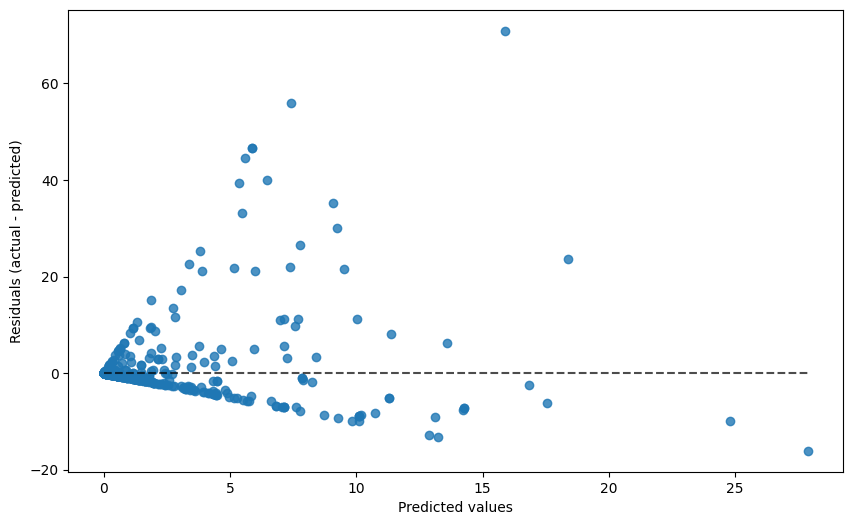

In [13]:
# Residuals vs Predicted - Train
display = PredictionErrorDisplay.from_estimator(k_mod, p.splited['prec']['X_train'],
                                                p.splited['prec']['y_train'])


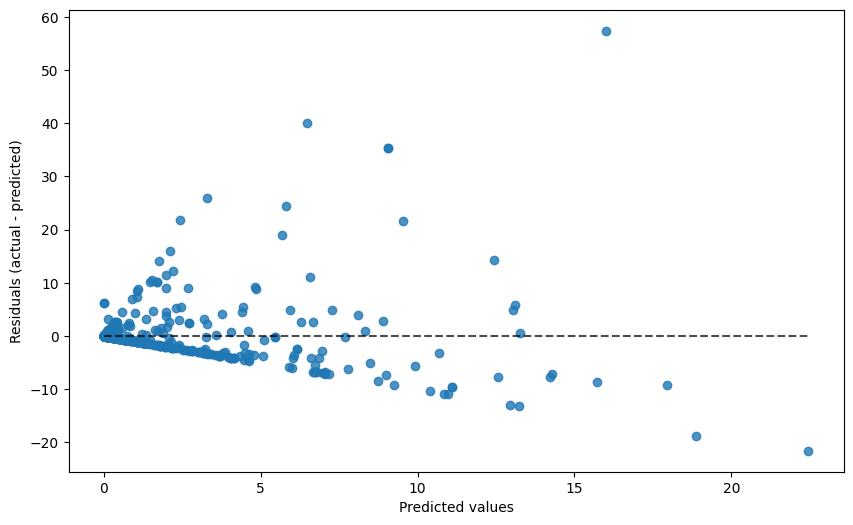

In [14]:
# Residuals vs Predicted - All
display = PredictionErrorDisplay.from_estimator(k_mod, prec_sc,p.y['prec'])

In [24]:
# -- KNeighborsRegressor
k_mod = KNeighborsRegressor(n_neighbors=8, metric='euclidean')
k_mod.fit(p.splited['prec']['X_train'], p.splited['prec']['y_train'])

KNeighborsRegressor(metric='euclidean', n_neighbors=8)

In [31]:
# Predictions
y_pred = k_mod.predict(p.splited['prec']['X_test'])
y_pred1 = k_mod.predict(p.splited['prec']['X_train'])
y_pred2 = k_mod.predict(prec_sc)
print("Use KNeighborsRegressor(k=8) rmse:\n",
      " - Test data:",
      np.sqrt(mean_squared_error(p.splited['prec']['y_test'], y_pred)),'\n',
      " - Train data:",
      np.sqrt(mean_squared_error(p.splited['prec']['y_train'], y_pred1)),'\n',
      " - All data:",
      np.sqrt(mean_squared_error(p.y['prec'], y_pred2))
)

Use KNeighborsRegressor(k=8) rmse:
  - Test data: 5.166484729494213 
  - Train data: 4.813050451310878 
  - All data: 4.903797722191659


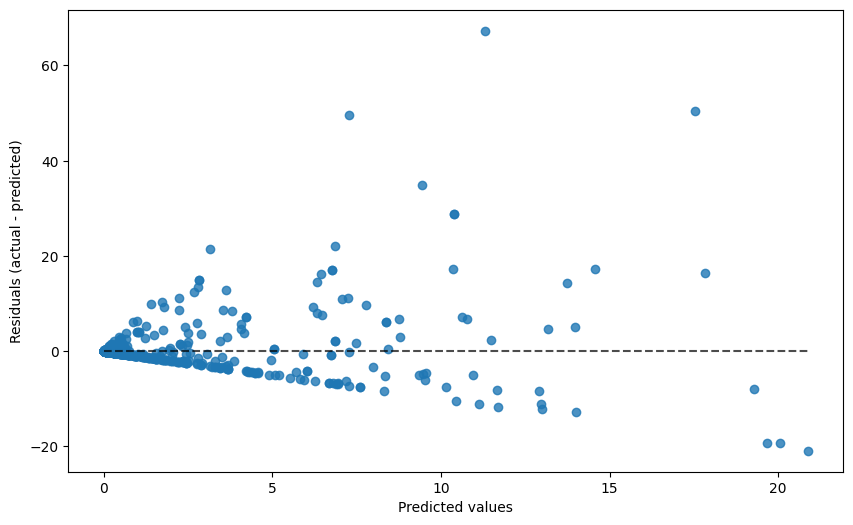

In [26]:
# Residuals vs Predicted - Train
display = PredictionErrorDisplay.from_estimator(k_mod, p.splited['prec']['X_train'],
                                                p.splited['prec']['y_train'])


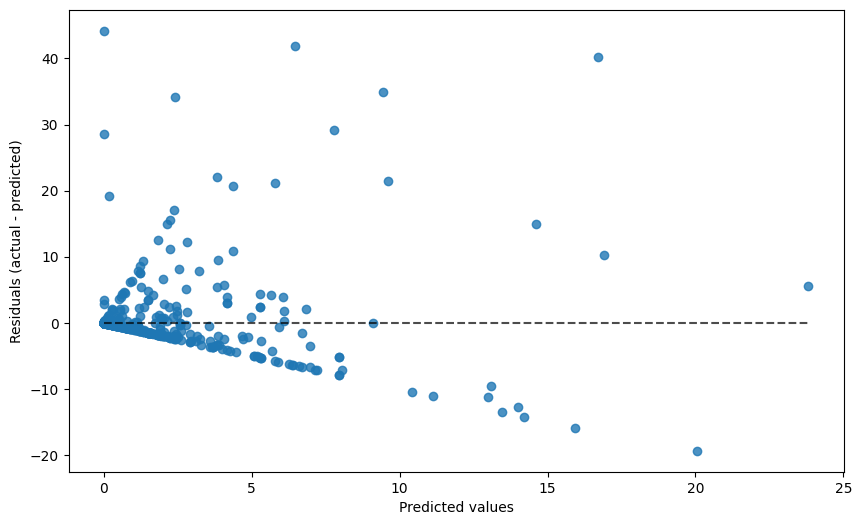

In [27]:
# Residuals vs Predicted - All
display = PredictionErrorDisplay.from_estimator(k_mod, prec_sc,p.y['prec'])

#### II - RandomForest
* Manual optimal search

In [28]:
# Errors
errors = {}
# Train loop
for d in range(10, 46):
    for cc in [0, .1, .01, .001, .0001]:
        error_test, error_train, error_all = 0, 0, 0
        # Model
        rf_mod = RandomForestRegressor(max_depth=d,ccp_alpha=cc,criterion='squared_error')
        rf_mod.fit(p.splited['prec']['X_train'], p.splited['prec']['y_train'])
        # Predictions
        pred_test = rf_mod.predict(p.splited['prec']['X_test'])
        pred_train = rf_mod.predict(p.splited['prec']['X_train'])
        pred_all = rf_mod.predict(prec_sc)
        # Error eval
        error_test = np.sqrt(mean_squared_error(p.splited['prec']['y_test'], pred_test))
        error_train = np.sqrt(mean_squared_error(p.splited['prec']['y_train'], pred_train))
        error_all = np.sqrt(mean_squared_error(p.y['prec'], pred_all))
        errors.update({f'{d}-{cc}':[error_test, error_train, error_all]})

In [29]:
# Top results
rf_results = pd.DataFrame(errors).T.rename(columns={0:'Test',1:'Train',2:'All'})
rf_results.sort_values(by='All').head(15)

,Test,Train,All
30-0.0001,5.098850,1.911111,3.039543
35-0,5.156829,1.897163,3.057391
33-0,5.105349,1.948531,3.060021
17-0,5.107400,1.954316,3.063641
36-0.0001,5.197229,1.880875,3.066931
25-0.0001,5.131381,1.947111,3.070211
28-0.001,5.158208,1.924960,3.070974
43-0.001,5.126420,1.954397,3.071612
44-0.001,5.143602,1.939687,3.071799
31-0,5.147085,1.939751,3.073288


* Metrics

In [30]:
# -- RandomForestRegressor
rf_mod = RandomForestRegressor(max_depth=30, ccp_alpha=.0001, criterion='squared_error')
rf_mod.fit(p.splited['prec']['X_train'], p.splited['prec']['y_train'])

RandomForestRegressor(ccp_alpha=0.0001, max_depth=30)

In [32]:
# Predictions
y_pred = rf_mod.predict(p.splited['prec']['X_test'])
y_pred1 = rf_mod.predict(p.splited['prec']['X_train'])
y_pred2 = rf_mod.predict(prec_sc)
print("Use RandomForestRegressor(30-0.0001) rmse:\n",
      " - Test data:\n",
      np.sqrt(mean_squared_error(p.splited['prec']['y_test'], y_pred)),'\n',
      " - Train data:\n",
      np.sqrt(mean_squared_error(p.splited['prec']['y_train'], y_pred1)),'\n',
      " - All data:\n",
      np.sqrt(mean_squared_error(p.y['prec'], y_pred2))
)

Use RandomForestRegressor(30-0.0001) rmse:
  - Test data:
 5.201782557977473 
  - Train data:
 1.949415378705963 
  - All data:
 3.1007742072216655


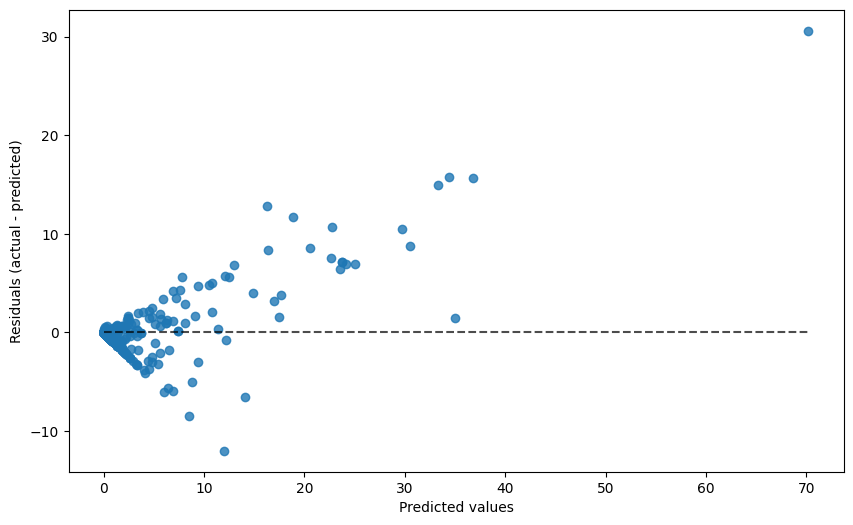

In [33]:
# Residuals vs Predicted - Train
display = PredictionErrorDisplay.from_estimator(rf_mod, p.splited['prec']['X_train'],
                                                p.splited['prec']['y_train'])

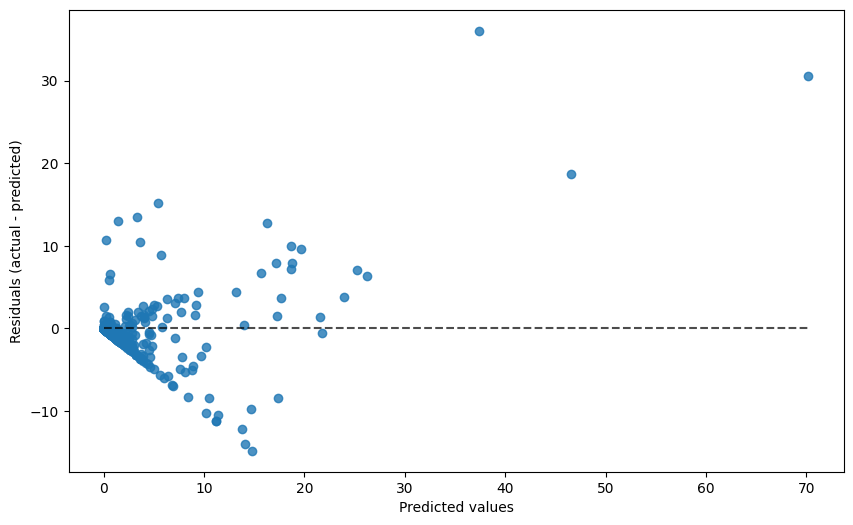

In [34]:
# Residuals vs Predicted - All
display = PredictionErrorDisplay.from_estimator(rf_mod, prec_sc,p.y['prec'])

In [35]:
# -- RandomForestRegressor
rf_mod = RandomForestRegressor(max_depth=35, ccp_alpha=0, criterion='squared_error')
rf_mod.fit(p.splited['prec']['X_train'], p.splited['prec']['y_train'])

RandomForestRegressor(ccp_alpha=0, max_depth=35)

In [37]:
# Predictions
y_pred = rf_mod.predict(p.splited['prec']['X_test'])
y_pred1 = rf_mod.predict(p.splited['prec']['X_train'])
y_pred2 = rf_mod.predict(prec_sc)
print("Use RandomForestRegressor(35-0) rmse:\n",
      " - Test data:\n",
      np.sqrt(mean_squared_error(p.splited['prec']['y_test'], y_pred)),'\n',
      " - Train data:\n",
      np.sqrt(mean_squared_error(p.splited['prec']['y_train'], y_pred1)),'\n',
      " - All data:\n",
      np.sqrt(mean_squared_error(p.y['prec'], y_pred2))
)

Use RandomForestRegressor(35-0) rmse:
  - Test data:
 5.075160014860674 
  - Train data:
 1.9287947778127037 
  - All data:
 3.038009095657601


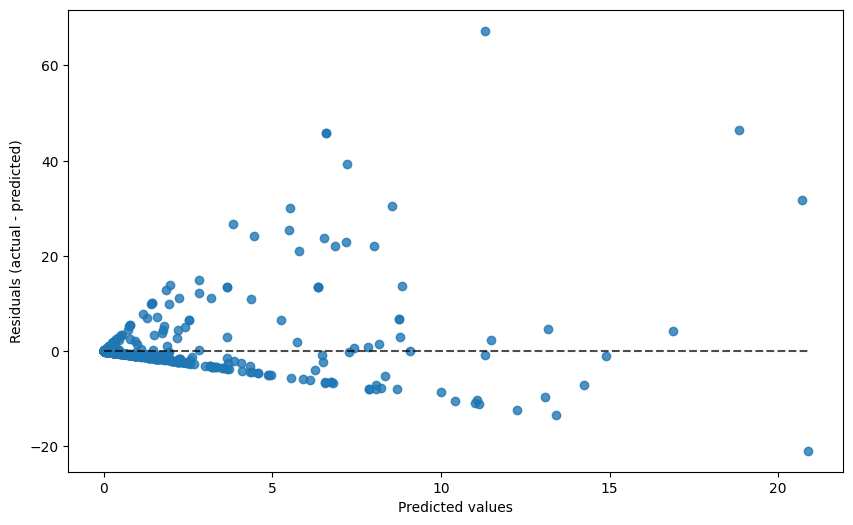

In [38]:
# Residuals vs Predicted - Train
display = PredictionErrorDisplay.from_estimator(k_mod, p.splited['prec']['X_train'],
                                                p.splited['prec']['y_train'])

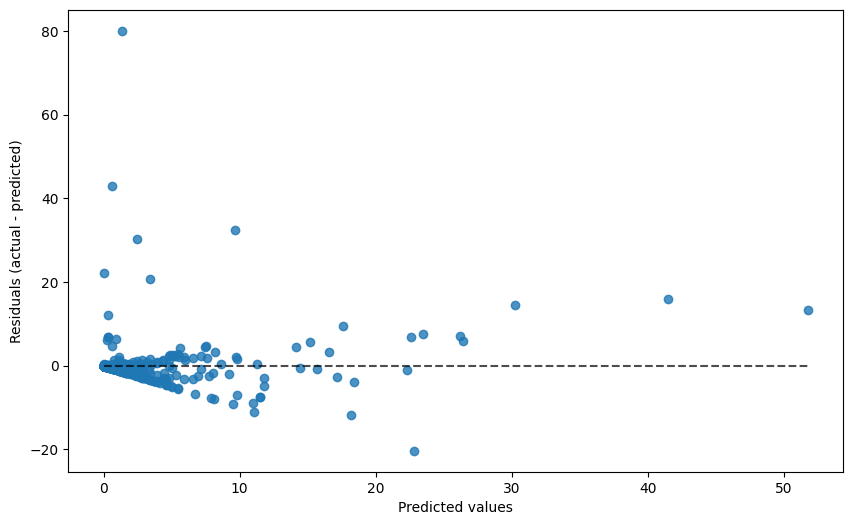

In [39]:
# Residuals vs Predicted - All
display = PredictionErrorDisplay.from_estimator(rf_mod, prec_sc,p.y['prec'])

In [40]:
# -- RandomForestRegressor
rf_mod = RandomForestRegressor(max_depth=33, ccp_alpha=0, criterion='squared_error')
rf_mod.fit(p.splited['prec']['X_train'], p.splited['prec']['y_train'])

RandomForestRegressor(ccp_alpha=0, max_depth=33)

In [41]:
# Predictions
y_pred = rf_mod.predict(p.splited['prec']['X_test'])
y_pred1 = rf_mod.predict(p.splited['prec']['X_train'])
y_pred2 = rf_mod.predict(prec_sc)
print("Use RandomForestRegressor(33-0) rmse:\n",
      " - Test data:\n",
      np.sqrt(mean_squared_error(p.splited['prec']['y_test'], y_pred)),'\n',
      " - Train data:\n",
      np.sqrt(mean_squared_error(p.splited['prec']['y_train'], y_pred1)),'\n',
      " - All data:\n",
      np.sqrt(mean_squared_error(p.y['prec'], y_pred2))
)

Use RandomForestRegressor(33-0) rmse:
  - Test data:
 5.240182419184804 
  - Train data:
 1.9216305769975164 
  - All data:
 3.1039291232923203


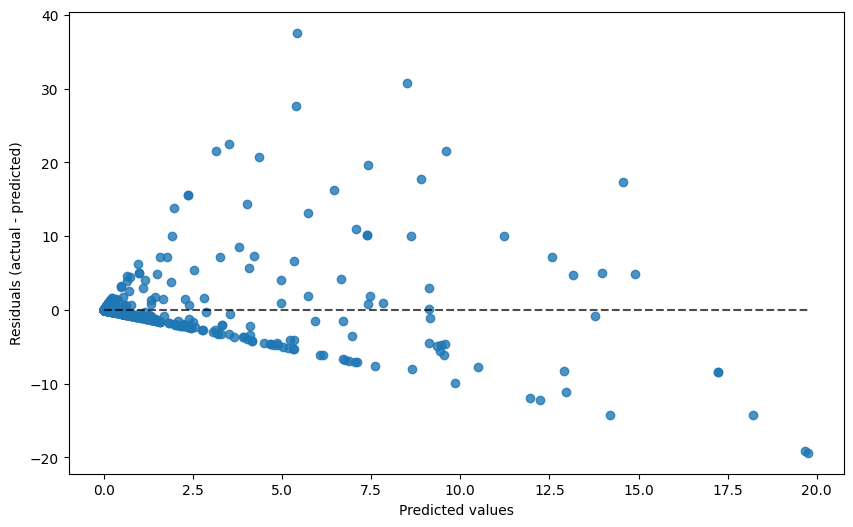

In [42]:
# Residuals vs Predicted - Train
display = PredictionErrorDisplay.from_estimator(k_mod, p.splited['prec']['X_train'],
                                                p.splited['prec']['y_train'])

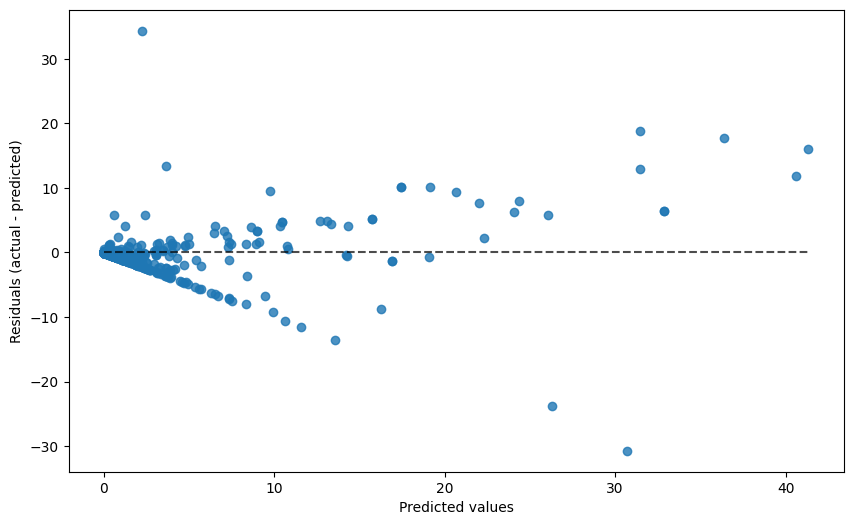

In [43]:
# Residuals vs Predicted - All
display = PredictionErrorDisplay.from_estimator(rf_mod, prec_sc,p.y['prec'])

#### III - DecisionTree
* Manual optimal search

In [44]:
# Errors
errors = {}
# Train loop
for d in range(15, 46):
    for cc in [0, .1, .01, .001, .0001]:
        error_test, error_train, error_all = 0, 0, 0
        # Model
        dt = DecisionTreeRegressor(max_depth=d,ccp_alpha=cc,criterion='squared_error')
        dt.fit(p.splited['prec']['X_train'], p.splited['prec']['y_train'])
        # Predictions
        pred_test = dt.predict(p.splited['prec']['X_test'])
        pred_train = dt.predict(p.splited['prec']['X_train'])
        pred_all = dt.predict(prec_sc)
        # Error eval
        error_test = np.sqrt(mean_squared_error(p.splited['prec']['y_test'], pred_test))
        error_train = np.sqrt(mean_squared_error(p.splited['prec']['y_train'], pred_train))
        error_all = np.sqrt(mean_squared_error(p.y['prec'], pred_all))
        errors.update({f'{d}-{cc}':[error_test, error_train, error_all]})

In [50]:
# Top results
dt_results = pd.DataFrame(errors).T.rename(columns={0:'Test',1:'Train',2:'All'})
dt_results.sort_values(by='All').query('Train > .01').head(15)

,Test,Train,All
35-0.001,7.333800,0.368340,3.680749
16-0.0001,7.314899,0.590098,3.692980
18-0,7.421370,0.272498,3.718181
19-0.0001,7.435803,0.192287,3.721629
24-0,7.517841,0.018754,3.758956
19-0,7.536017,0.164997,3.770717
20-0,7.565345,0.090342,3.783481
40-0.0001,7.596592,0.107626,3.799439
27-0.001,7.586998,0.368340,3.806887
45-0.001,7.620609,0.368340,3.823634


* Metrics

In [51]:
# -- DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=35,ccp_alpha=.001,criterion='squared_error')
dt.fit(p.splited['prec']['X_train'], p.splited['prec']['y_train'])

DecisionTreeRegressor(ccp_alpha=0.001, max_depth=35)

In [55]:
# Predictions
y_pred = dt.predict(p.splited['prec']['X_test'])
y_pred1 = dt.predict(p.splited['prec']['X_train'])
y_pred2 = dt.predict(prec_sc)
print("Use DecisionTreeRegressor(35-0.001) rmse:\n",
      " - Test data:\n",
      np.sqrt(mean_squared_error(p.splited['prec']['y_test'], y_pred)),'\n',
      " - Train data:\n",
      np.sqrt(mean_squared_error(p.splited['prec']['y_train'], y_pred1)),'\n',
      " - All data:\n",
      np.sqrt(mean_squared_error(p.y['prec'], y_pred2))
)

Use DecisionTreeRegressor(35-0.001) rmse:
  - Test data:
 7.668605075834833 
  - Train data:
 0.3687166313789817 
  - All data:
 3.847575849541051


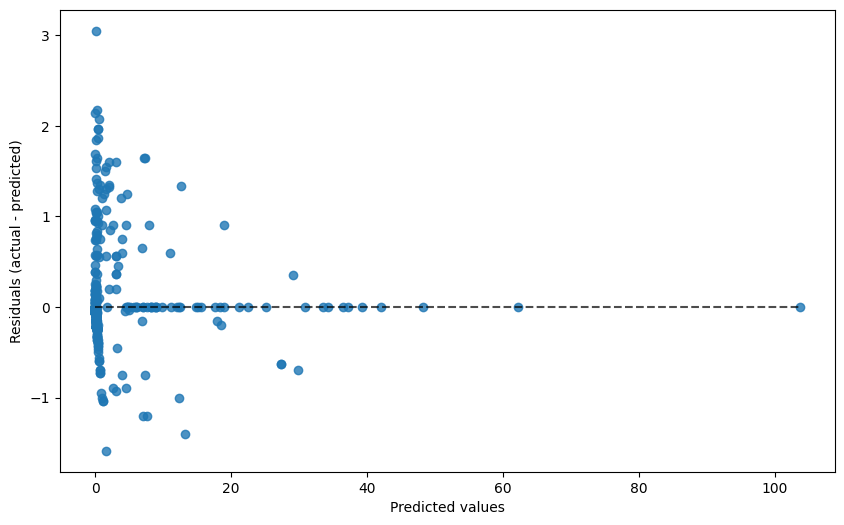

In [53]:
# Residuals vs Predicted - Train
display = PredictionErrorDisplay.from_estimator(dt, p.splited['prec']['X_train'],
                                                p.splited['prec']['y_train'])

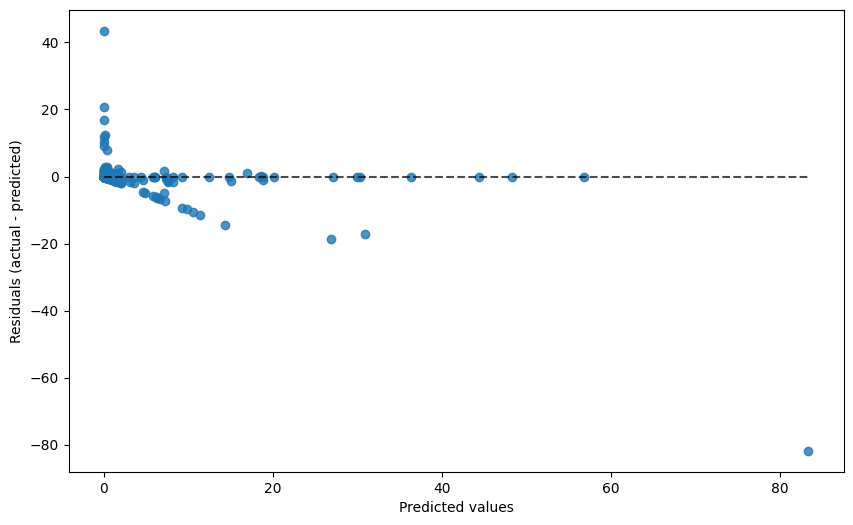

In [54]:
# Residuals vs Predicted - All
display = PredictionErrorDisplay.from_estimator(dt, prec_sc,p.y['prec'])

In [56]:
# -- DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=16,ccp_alpha=.0001,criterion='squared_error')
dt.fit(p.splited['prec']['X_train'], p.splited['prec']['y_train'])

DecisionTreeRegressor(ccp_alpha=0.0001, max_depth=16)

In [57]:
# Predictions
y_pred = dt.predict(p.splited['prec']['X_test'])
y_pred1 = dt.predict(p.splited['prec']['X_train'])
y_pred2 = dt.predict(prec_sc)
print("Use DecisionTreeRegressor(16-0.0001) rmse:\n",
      " - Test data:\n",
      np.sqrt(mean_squared_error(p.splited['prec']['y_test'], y_pred)),'\n',
      " - Train data:\n",
      np.sqrt(mean_squared_error(p.splited['prec']['y_train'], y_pred1)),'\n',
      " - All data:\n",
      np.sqrt(mean_squared_error(p.y['prec'], y_pred2))
)

Use DecisionTreeRegressor(16-0.0001) rmse:
  - Test data:
 7.535497777849705 
  - Train data:
 0.5900983915377334 
  - All data:
 3.8022485155189454


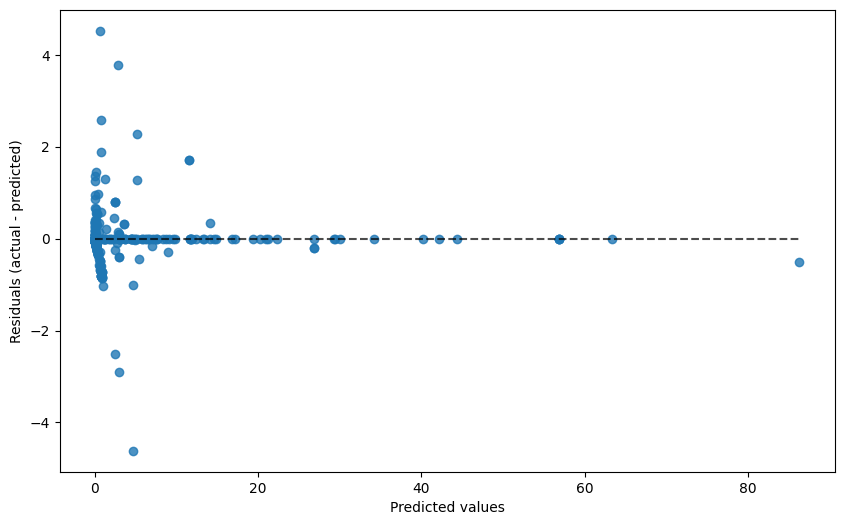

In [58]:
# Residuals vs Predicted - Train
display = PredictionErrorDisplay.from_estimator(dt, p.splited['prec']['X_train'],
                                                p.splited['prec']['y_train'])

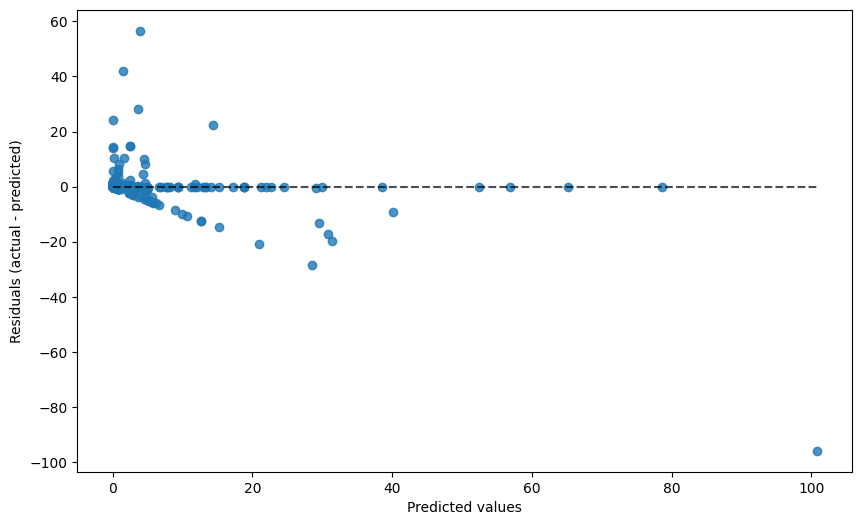

In [59]:
# Residuals vs Predicted - All
display = PredictionErrorDisplay.from_estimator(dt, prec_sc,p.y['prec'])

In [60]:
# -- DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=18,ccp_alpha=0,criterion='squared_error')
dt.fit(p.splited['prec']['X_train'], p.splited['prec']['y_train'])

DecisionTreeRegressor(ccp_alpha=0, max_depth=18)

In [61]:
# Predictions
y_pred = dt.predict(p.splited['prec']['X_test'])
y_pred1 = dt.predict(p.splited['prec']['X_train'])
y_pred2 = dt.predict(prec_sc)
print("Use DecisionTreeRegressor(18-0) rmse:\n",
      " - Test data:\n",
      np.sqrt(mean_squared_error(p.splited['prec']['y_test'], y_pred)),'\n',
      " - Train data:\n",
      np.sqrt(mean_squared_error(p.splited['prec']['y_train'], y_pred1)),'\n',
      " - All data:\n",
      np.sqrt(mean_squared_error(p.y['prec'], y_pred2))
)

Use DecisionTreeRegressor(18-0) rmse:
  - Test data:
 7.808444423846474 
  - Train data:
 0.2724979332648882 
  - All data:
 3.91134790357493


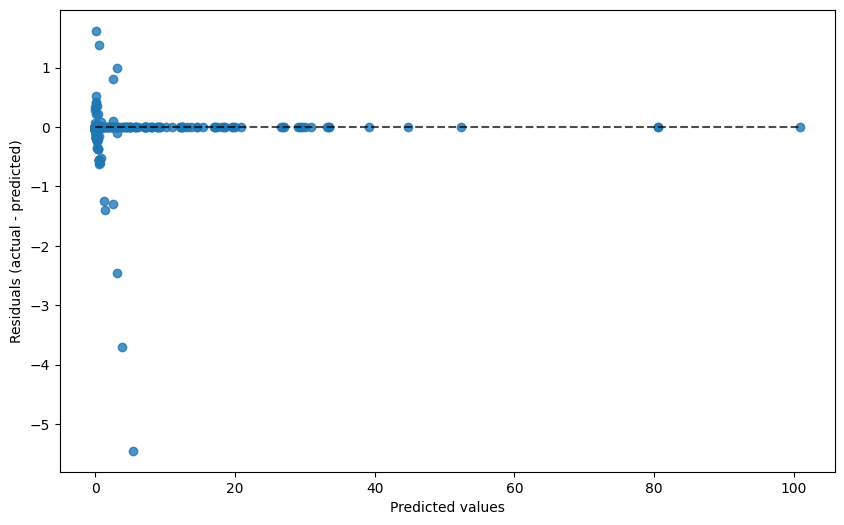

In [62]:
# Residuals vs Predicted - Train
display = PredictionErrorDisplay.from_estimator(dt, p.splited['prec']['X_train'],
                                                p.splited['prec']['y_train'])

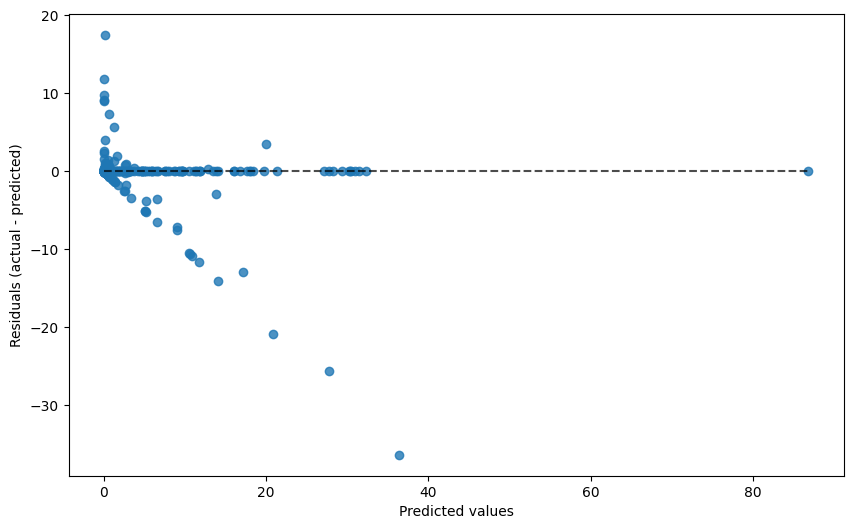

In [63]:
# Residuals vs Predicted - All
display = PredictionErrorDisplay.from_estimator(dt, prec_sc,p.y['prec'])

#### IV - BoostingClassifier
* Manual optimal search

In [68]:
# Model base
dt = DecisionTreeRegressor(max_depth=16, ccp_alpha=.0001, criterion='squared_error')
# Errors
errors = {}
# Train loop
for n in range(50,200,5):
    error_test, error_train, error_all = 0, 0, 0
    bg = AdaBoostRegressor(estimator=dt, n_estimators=n)
    bg.fit(p.splited['prec']['X_train'], p.splited['prec']['y_train'])
    # Predictions
    pred_all = bg.predict(prec_sc)
    pred_train = bg.predict(p.splited['prec']['X_train'])
    pred_test = bg.predict(p.splited['prec']['X_test'])
    # Error eval
    error_test = np.sqrt(mean_squared_error(p.splited['prec']['y_test'], pred_test))
    error_train = np.sqrt(mean_squared_error(p.splited['prec']['y_train'], pred_train))
    error_all = np.sqrt(mean_squared_error(p.y['prec'], pred_all))
    errors.update({f'{n}':[error_test, error_train, error_all]})

In [71]:
# Top results
bs_results = pd.DataFrame(errors).T.rename(columns={0:'Test',1:'Train',2:'All'})
bs_results.sort_values(by='All').head(15)

,Test,Train,All
155,5.008796,0.180385,2.509266
165,5.054444,0.176235,2.531827
110,5.077515,0.184715,2.543792
160,5.079926,0.174864,2.544474
195,5.089495,0.187328,2.549914
140,5.098961,0.180833,2.554286
185,5.102685,0.178832,2.556039
190,5.116562,0.171573,2.562592
55,5.118884,0.197297,2.565139
95,5.123920,0.185529,2.566993


* Metrics

In [86]:
# Model base
dt = DecisionTreeRegressor(max_depth=16, ccp_alpha=.0001, criterion='squared_error')

In [87]:
# -- BoostRegressor
bs = AdaBoostRegressor(base_estimator=dt, n_estimators=155)
bs.fit(p.splited['prec']['X_train'], p.splited['prec']['y_train'])

c:\Chinook\Master_Python\Proyectos\TFM\tfm_predictor\env\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0001,
                                                       max_depth=16),
                  n_estimators=155)

In [88]:
# Predictions
y_pred = bs.predict(p.splited['prec']['X_test'])
y_pred1 = bs.predict(p.splited['prec']['X_train'])
y_pred2 = bs.predict(prec_sc)
print("Use AdaBoostRegressor(n=155) rmse:\n",
      " - Test data:\n",
      np.sqrt(mean_squared_error(p.splited['prec']['y_test'], y_pred)),'\n',
      " - Train data:\n",
      np.sqrt(mean_squared_error(p.splited['prec']['y_train'], y_pred1)),'\n',
      " - All data:\n",
      np.sqrt(mean_squared_error(p.y['prec'], y_pred2))
)

Use AdaBoostRegressor(n=155) rmse:
  - Test data:
 5.135581050440086 
  - Train data:
 0.1877710744673226 
  - All data:
 2.5729344460585826


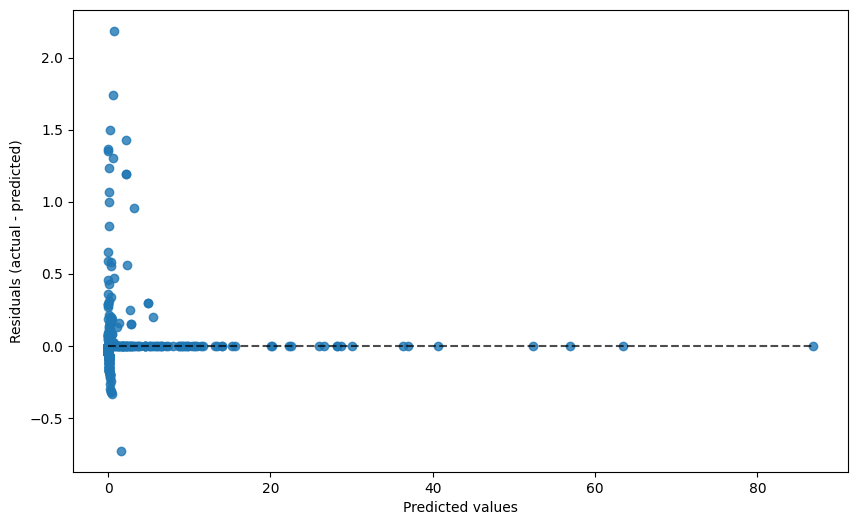

In [89]:
# Residuals vs Predicted - Train
display = PredictionErrorDisplay.from_estimator(bs, p.splited['prec']['X_train'],
                                                p.splited['prec']['y_train'])

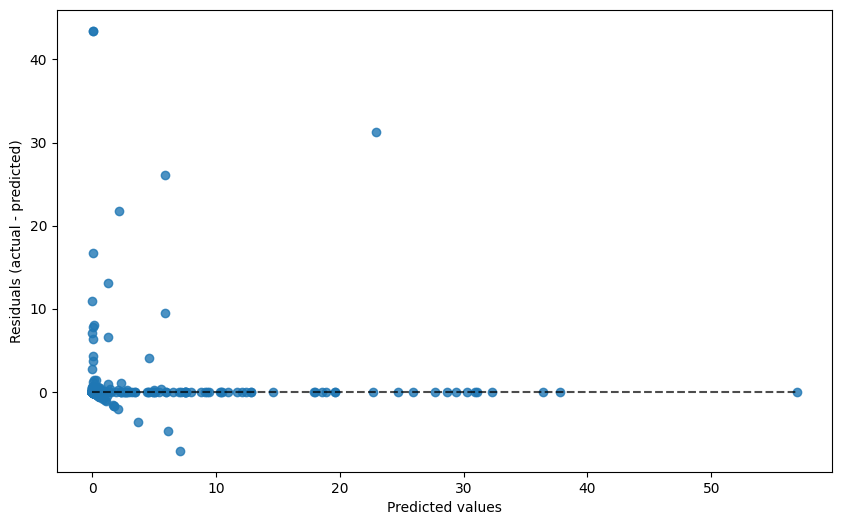

In [90]:
# Residuals vs Predicted - All
display = PredictionErrorDisplay.from_estimator(bs, prec_sc,p.y['prec'])

In [91]:
# -- BoostRegressor
bs = AdaBoostRegressor(base_estimator=dt, n_estimators=165)
bs.fit(p.splited['prec']['X_train'], p.splited['prec']['y_train'])

c:\Chinook\Master_Python\Proyectos\TFM\tfm_predictor\env\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0001,
                                                       max_depth=16),
                  n_estimators=165)

In [92]:
# Predictions
y_pred = bs.predict(p.splited['prec']['X_test'])
y_pred1 = bs.predict(p.splited['prec']['X_train'])
y_pred2 = bs.predict(prec_sc)
print("Use AdaBoostRegressor(n=165) rmse:\n",
      " - Test data:\n",
      np.sqrt(mean_squared_error(p.splited['prec']['y_test'], y_pred)),'\n',
      " - Train data:\n",
      np.sqrt(mean_squared_error(p.splited['prec']['y_train'], y_pred1)),'\n',
      " - All data:\n",
      np.sqrt(mean_squared_error(p.y['prec'], y_pred2))
)

Use AdaBoostRegressor(n=165) rmse:
  - Test data:
 5.139995907587074 
  - Train data:
 0.18494581673675853 
  - All data:
 2.5749841162324256


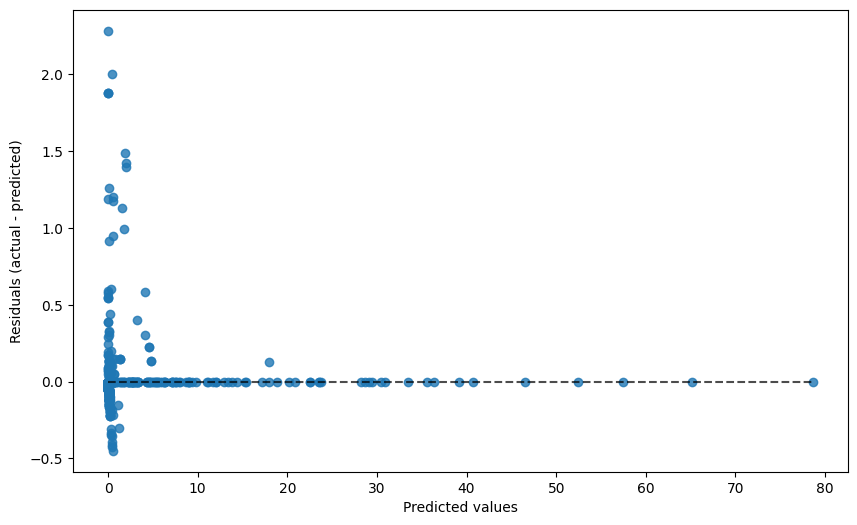

In [93]:
# Residuals vs Predicted - Train
display = PredictionErrorDisplay.from_estimator(bs, p.splited['prec']['X_train'],
                                                p.splited['prec']['y_train'])

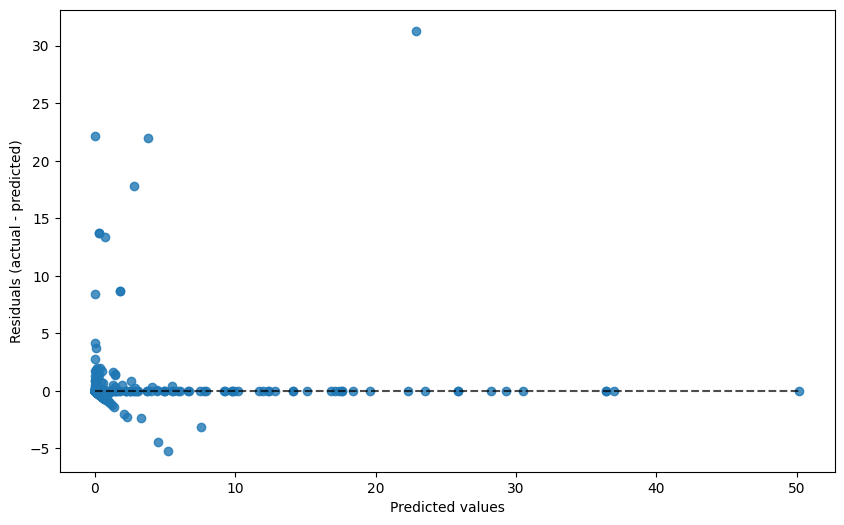

In [94]:
# Residuals vs Predicted - All
display = PredictionErrorDisplay.from_estimator(bs, prec_sc,p.y['prec'])

In [95]:
# -- BoostRegressor
bs = AdaBoostRegressor(base_estimator=dt, n_estimators=110)
bs.fit(p.splited['prec']['X_train'], p.splited['prec']['y_train'])

c:\Chinook\Master_Python\Proyectos\TFM\tfm_predictor\env\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0001,
                                                       max_depth=16),
                  n_estimators=110)

In [96]:
# Predictions
y_pred = bs.predict(p.splited['prec']['X_test'])
y_pred1 = bs.predict(p.splited['prec']['X_train'])
y_pred2 = bs.predict(prec_sc)
print("Use AdaBoostRegressor(n=110) rmse:\n",
      " - Test data:\n",
      np.sqrt(mean_squared_error(p.splited['prec']['y_test'], y_pred)),'\n',
      " - Train data:\n",
      np.sqrt(mean_squared_error(p.splited['prec']['y_train'], y_pred1)),'\n',
      " - All data:\n",
      np.sqrt(mean_squared_error(p.y['prec'], y_pred2))
)

Use AdaBoostRegressor(n=110) rmse:
  - Test data:
 5.149409641528315 
  - Train data:
 0.18335034843789816 
  - All data:
 2.5795964658780286


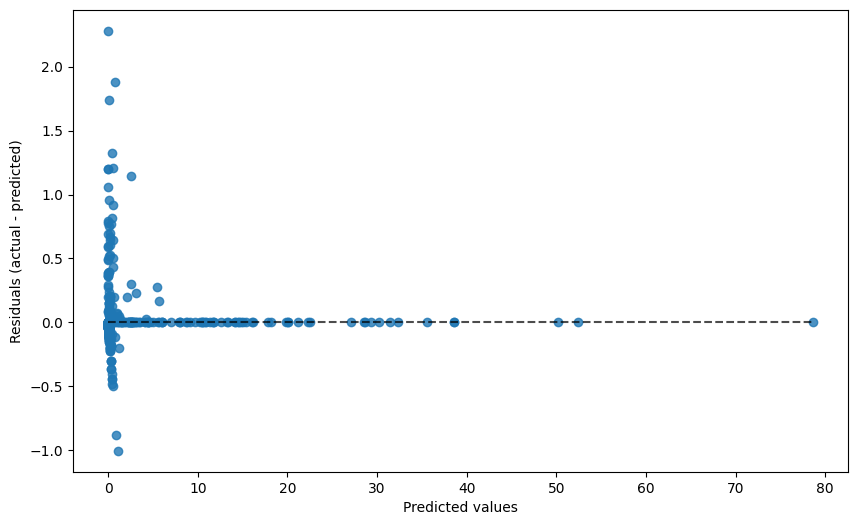

In [97]:
# Residuals vs Predicted - Train
display = PredictionErrorDisplay.from_estimator(bs, p.splited['prec']['X_train'],
                                                p.splited['prec']['y_train'])

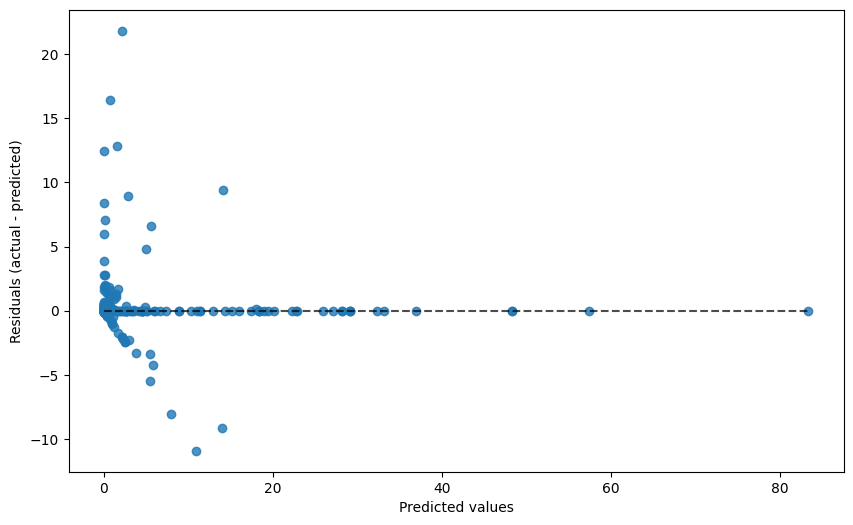

In [98]:
# Residuals vs Predicted - All
display = PredictionErrorDisplay.from_estimator(bs, prec_sc,p.y['prec'])